In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_excel(R"C:\Users\jesus\Downloads\Sales_bike.xlsx")
sales.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [4]:
%matplotlib inline

In [5]:
sales.shape

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
# Statistical Properties DataFrame for sales_data
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Numerical analysis and Visualization
We'll analyze the Unit_Cost colum:

In [8]:
sales_modified = sales.copy()
sales_modified

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [9]:
sales_modified ['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<AxesSubplot:>

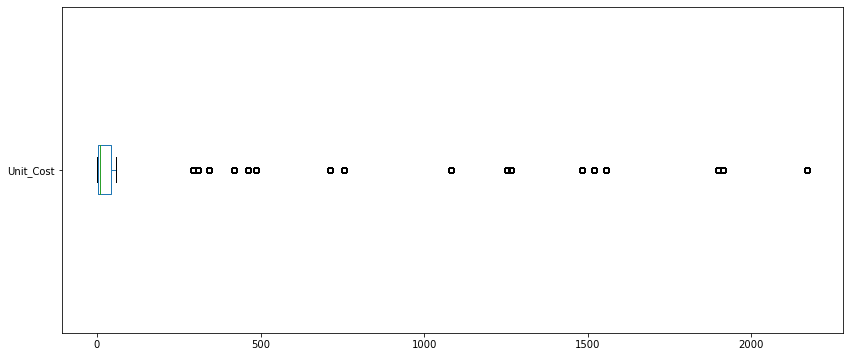

In [10]:
sales_modified['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

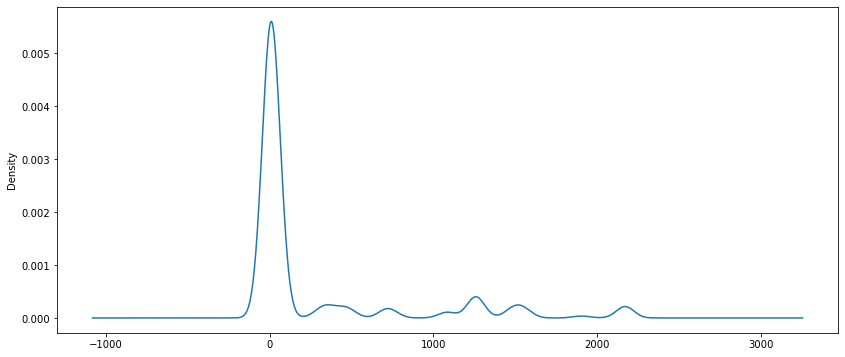

In [11]:
sales_modified['Unit_Cost'].plot(kind='density', figsize=(14,6))

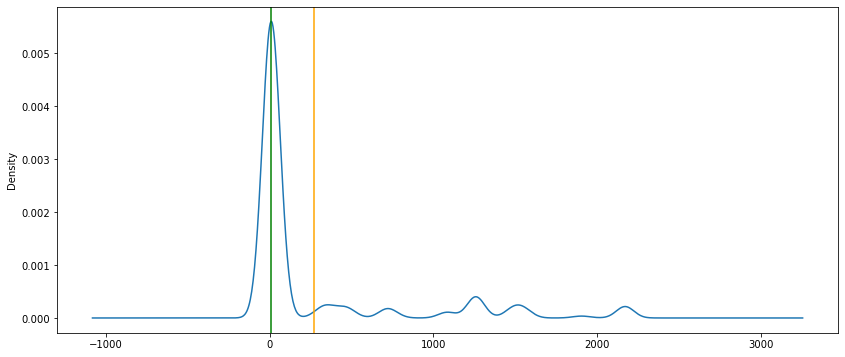

In [12]:
ox = sales_modified['Unit_Cost'].plot(kind='density', figsize=(14,6))
ox.axvline(sales_modified['Unit_Cost'].mean(), color='orange')
ox.axvline(sales_modified['Unit_Cost'].median(), color='green')

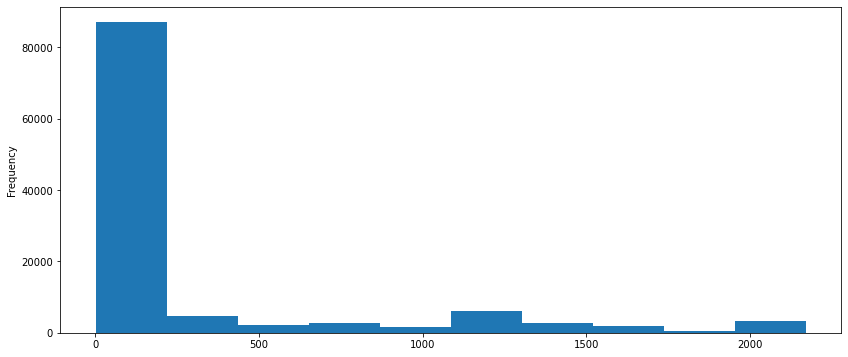

In [13]:
ox = sales_modified['Unit_Cost'].plot(kind='hist',  figsize=(14,6))

# Categorical analysis and Visualization
we'll analyze the Age_Group:

In [14]:
sales_modified['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

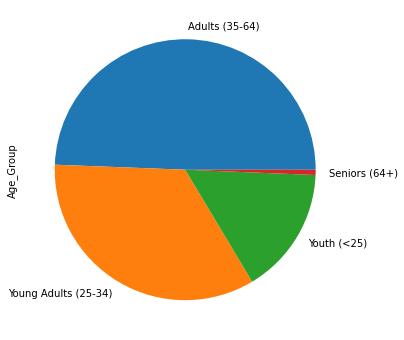

In [15]:
sales_modified['Age_Group'].value_counts().plot(kind='pie', figsize=(14,6))

<AxesSubplot:>

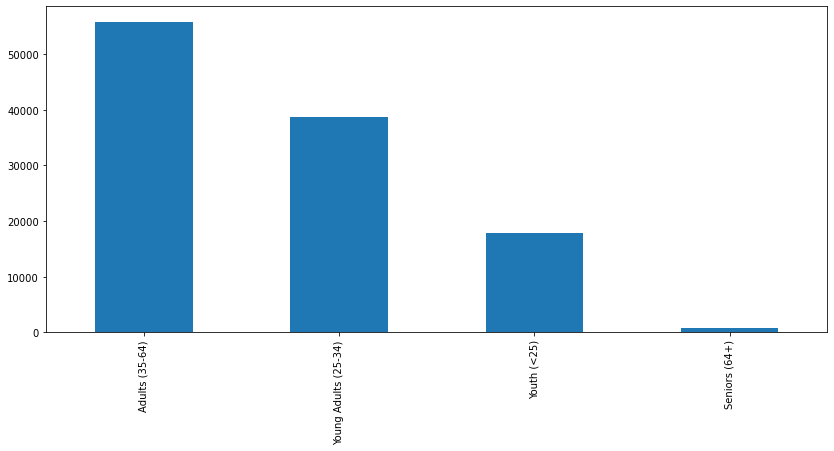

In [52]:
 sales_modified['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

# Ralationship between the columns!
what are the relationship and there significants amonge the columns

In [17]:
corr = sales_modified.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


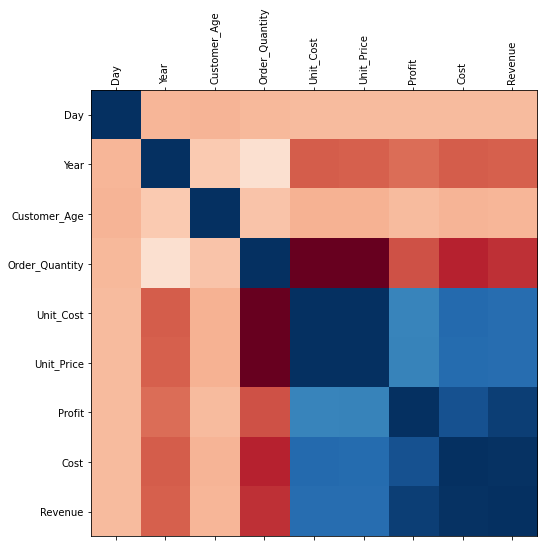

In [18]:
fig = plt.figure(figsize=(34,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

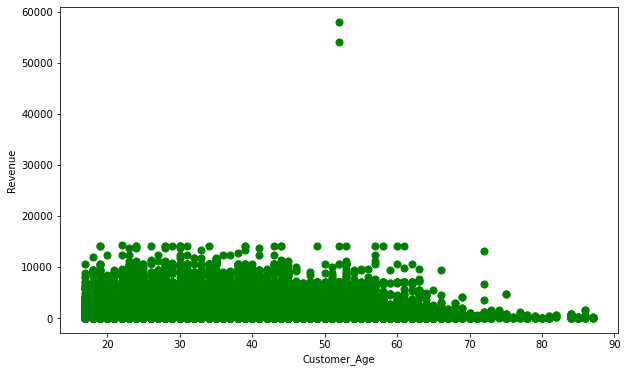

In [19]:
sales_modified.plot(kind='scatter', x='Customer_Age', y='Revenue', s=50, c='green', figsize=(10,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

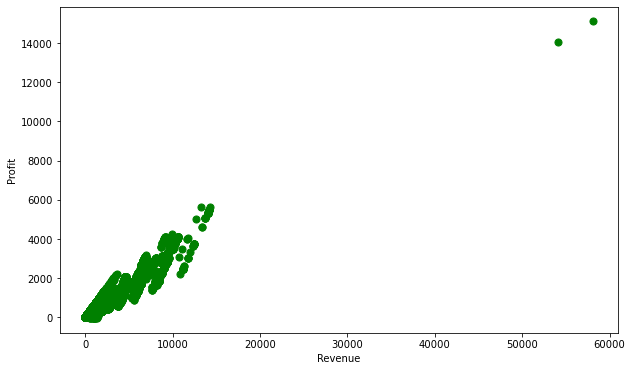

In [20]:
sales_modified.plot(kind='scatter', x='Revenue', y='Profit', s=50, c='green', figsize=(10,6))

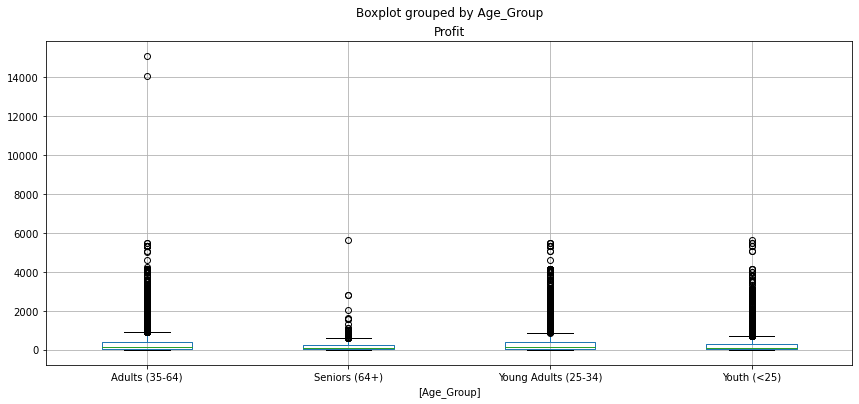

In [21]:
ax = sales_modified[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(14,6))

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

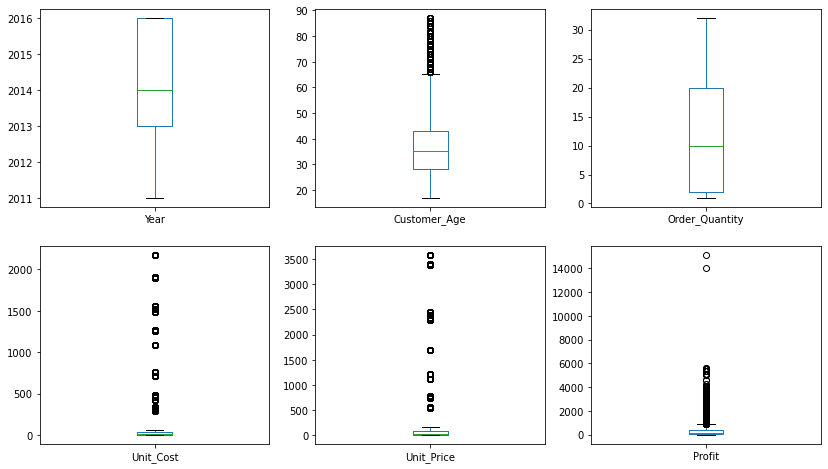

In [22]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales_modified[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

# Column Wrangling
We can also create new columns or modify existing ones:

In [23]:
sales_modified['Revenue_Per_Age'] = sales_modified['Revenue'] / sales_modified['Customer_Age']
sales_modified['Revenue_Per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_Per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

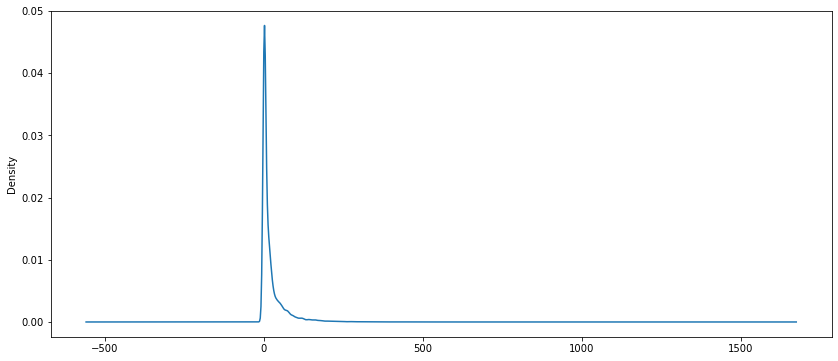

In [24]:
sales_modified['Revenue_Per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

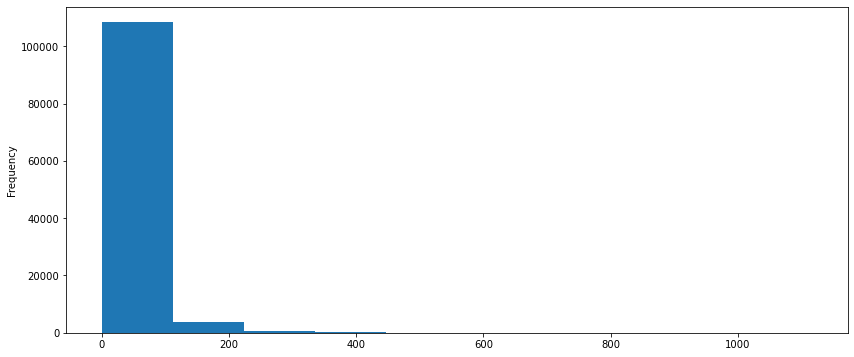

In [25]:
sales_modified['Revenue_Per_Age'].plot(kind='hist', figsize=(14,6))

# Add and Calculate a new Calculated_Cost column
Calculated_Cost = order_quantity * unity_cost

In [26]:
sales_modified['Calculated_Cost'] = sales_modified['Order_Quantity'] * sales_modified['Unit_Cost']
sales_modified['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [27]:
# checking for missing value and data validation
(sales_modified['Calculated_Cost'] != sales_modified['Cost']). sum()

0

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

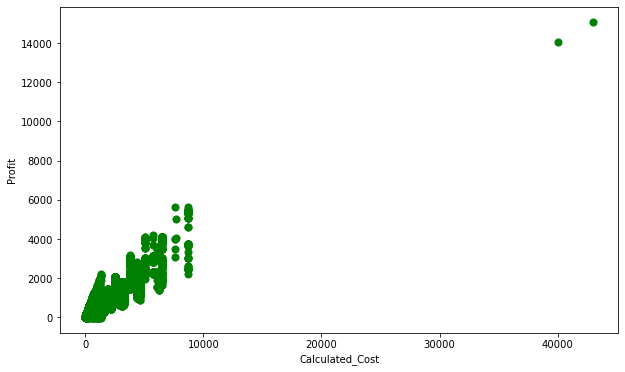

In [28]:
sales_modified.plot(kind='scatter', x='Calculated_Cost', y='Profit', s=50, c='green', figsize=(10,6))

In [29]:
sales_modified['Calculated_Revenue'] = sales_modified['Cost'] + sales_modified['Profit']
sales_modified['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [30]:
(sales_modified['Calculated_Revenue'] != sales_modified['Revenue']). sum()

0

<AxesSubplot:ylabel='Frequency'>

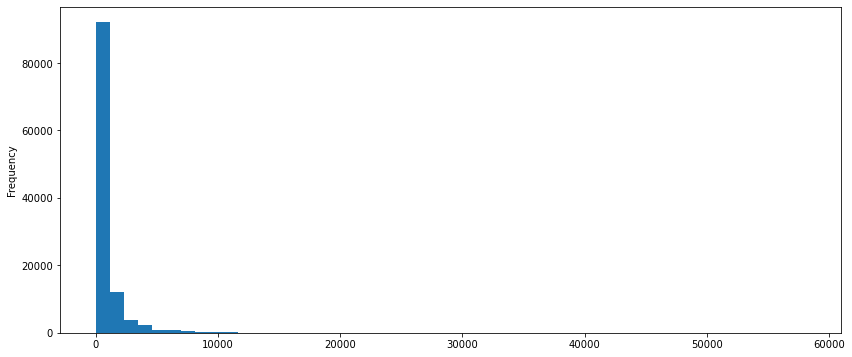

In [31]:
sales_modified['Revenue'].plot(kind='hist', bins=50, figsize=(14,6))

In [32]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [33]:
sales_modified2 = sales.copy()
sales_modified2.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [34]:
#sales_modified['Unit_Price'] = sales_modified['Unit_Price'] * 1.05
sales_modified2['Unit_Price'] *= 1.03

In [35]:
sales_modified2['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [36]:
sales_modified2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [37]:
 #sales_modified2.loc[sales_modified2['State'] == 'Oregon']

In [38]:
# Get the mean revenue of the Adults in the range of 35-64 (sales group)
sales_modified2.loc[sales_modified2['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [39]:
#number of records belong to Age group Youth (25-43) or Seniors (64+)?
sales_modified2.loc[(sales_modified2['Age_Group'] == 'Youth (25-43)') | 
                     (sales_modified2['Age_Group'] == 'Seniors (64+)')].shape[0]
                      

730

In [40]:
# The mean Revenue of sales group Adults (35-64) in Canada
sales_modified2.loc[(sales_modified2['Age_Group'] == 'Adults (35-64)') & 
                    (sales_modified2['Country'] == 'Canada'), 'Revenue'].mean()

616.0251466890193

# Increase the revenue by 10% to every sale made in British Columbia (Canada)
   

In [41]:
sales_modified2.loc[(sales_modified2['Country'] == 'Canada') & 
                    (sales_modified2['State'] == 'British Columbia'), 'Revenue'].head()

0     950
1     950
14    594
15    832
16    238
Name: Revenue, dtype: int64

In [42]:
sales_modified2.loc[sales_modified2['State'] == 'British Columbia', 'Revenue'] *= 1.1

In [43]:
sales_modified2.loc[sales_modified2['State'] == 'British Columbia', 'Revenue'].head()

0     1045.0
1     1045.0
14     653.4
15     915.2
16     261.8
Name: Revenue, dtype: float64